In [2]:
%matplotlib inline

import itertools
import json
import numpy as np
import matplotlib.pyplot as plt
from control import group_results_by

In [3]:
def group_results_by(results, attribs):
    def keyfunc(r):
        descr = r['description']
        return tuple(descr[attrib] for attrib in attribs)
    
    marginal_keys = [k for k in results[0]['description'].keys() if k not in attribs]
    marginal_keys.sort()
    def keyfunc2(r):
        descr = r['description']
        return tuple(descr[k] for k in marginal_keys)

    results = sorted(results, key=keyfunc)
    for (k, r) in itertools.groupby(results, keyfunc):
        yield (k, list(sorted(r, key=keyfunc2)))

In [4]:
with open('output.json', 'r') as f:
    all_results = json.load(f)
    
for result in all_results:
    result['mean'] = np.mean(result['samples'])
    result['stdev'] = np.std(result['samples'])

In [5]:
print(all_results[0]['description'].keys())

dict_keys(['dims', 'pop_rows', 'pop_cols', 'phi1', 'phi2', 'std_dev', 'constr', 'w_min', 'w_max', 'rng_broadcast', 'max_iter', 'nsamples', 'function', 'topology', 'variant', 'rng', 'perlin_octaves', 'randwalk_step_scale'])


In [6]:
def compare_rng():
    for ((dims, rng_broadcast,), results) in group_results_by(all_results, ['dims', 'rng_broadcast']):
        if rng_broadcast:
            continue
        
        for ((variant, function,), results) in group_results_by(results, ['variant', 'function']):
            fig, ax = plt.subplots(figsize=(9, 3))

            title = '{}D {} {} bcast={}'.format(dims, function, variant, 'T' if rng_broadcast else 'F')
            fig.suptitle(title)
            fig.tight_layout(rect=[0.05, 0, 1, 0.95])

            dx = 0.0
            printed_ord = False
            for ((rng,), results) in group_results_by(results, ['rng']):
                results.sort(key=lambda r: r['description']['topology'])
                def others():
                    for r in results:
                        descr = r['description']
                        yield '{},{} {}'.format(descr['phi1'], descr['phi2'], descr['topology'][:1])

                if not printed_ord:
                    print('; '.join([o for o in others()]))
                    printed_ord = True
                    
                    for i in range(2, len(results) - 1, 3):
                        if i % 12 == 11:
                            ax.axvline(x=i + 0.5, linewidth=1, color='black')
                        else:
                            ax.axvline(x=i + 0.5, linewidth=1, color='black', dashes=[4, 4])

                means = [r['mean'] for r in results]
                stdevs = [r['stdev'] * 0.1 for r in results]

                ax.errorbar(np.arange(len(means)) + dx, means, stdevs, label=rng, capsize=2, linestyle='None', marker='^')
                dx += 0.1

            fig.legend()
            fig.show()
            fig.savefig('graphs/RNG %s.png' % title)
            
def compare_bcast():
    for ((dims,), results) in group_results_by(all_results, ['dims',]):
        for ((variant, function,), results) in group_results_by(results, ['variant', 'function']):
            fig, ax = plt.subplots(figsize=(9, 3))

            title = '{}D {} {}'.format(dims, function, variant)
            fig.suptitle(title)
            fig.tight_layout(rect=[0.05, 0, 1, 0.95])
            
            dx = 0.0
            printed_ord = False
            for ((rng_broadcast,), results) in group_results_by(results, ['rng_broadcast']):
                results.sort(key=lambda r: (r['description']['topology'], r['description']['rng']))
                def others():
                    for r in results:
                        descr = r['description']
                        yield '{} {} {}'.format(descr['phi1'], descr['topology'][:1], descr['rng'][:1])

                if not printed_ord:
                    print('; '.join([o for o in others()]))
                    printed_ord = True
                    
                    for i in range(2, len(results) - 1, 3):
                        if i % 12 == 11:
                            ax.axvline(x=i + 0.5, linewidth=1, color='black')
                        else:
                            ax.axvline(x=i + 0.5, linewidth=1, color='black', dashes=[4, 4])
                
                means = [r['mean'] for r in results]
                stdevs = [r['stdev'] * 0.1 for r in results]

                ax.errorbar(np.arange(len(means)) + dx, means, stdevs, label=('Broadcast = %s' % rng_broadcast), capsize=2, linestyle='None', marker='^')

            fig.legend()
            fig.show()
            fig.savefig('graphs/Bcast %s.png' % title)

In [7]:
#compare_bcast()

1.85,2.25 4; 2.05,2.05 4; 2.25,1.85 4; 1.85,2.25 f; 2.05,2.05 f; 2.25,1.85 f; 1.85,2.25 r; 2.05,2.05 r; 2.25,1.85 r
1.85,2.25 4; 2.05,2.05 4; 2.25,1.85 4; 1.85,2.25 f; 2.05,2.05 f; 2.25,1.85 f; 1.85,2.25 r; 2.05,2.05 r; 2.25,1.85 r
1.85,2.25 4; 2.05,2.05 4; 2.25,1.85 4; 1.85,2.25 f; 2.05,2.05 f; 2.25,1.85 f; 1.85,2.25 r; 2.05,2.05 r; 2.25,1.85 r


/tmp/ipykernel_502328/318768360.py:39: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


1.85,2.25 4; 2.05,2.05 4; 2.25,1.85 4; 1.85,2.25 f; 2.05,2.05 f; 2.25,1.85 f; 1.85,2.25 r; 2.05,2.05 r; 2.25,1.85 r
1.85,2.25 4; 2.05,2.05 4; 2.25,1.85 4; 1.85,2.25 f; 2.05,2.05 f; 2.25,1.85 f; 1.85,2.25 r; 2.05,2.05 r; 2.25,1.85 r
1.85,2.25 4; 2.05,2.05 4; 2.25,1.85 4; 1.85,2.25 f; 2.05,2.05 f; 2.25,1.85 f; 1.85,2.25 r; 2.05,2.05 r; 2.25,1.85 r
1.85,2.25 4; 2.05,2.05 4; 2.25,1.85 4; 1.85,2.25 f; 2.05,2.05 f; 2.25,1.85 f; 1.85,2.25 r; 2.05,2.05 r; 2.25,1.85 r
1.85,2.25 4; 2.05,2.05 4; 2.25,1.85 4; 1.85,2.25 f; 2.05,2.05 f; 2.25,1.85 f; 1.85,2.25 r; 2.05,2.05 r; 2.25,1.85 r
1.85,2.25 4; 2.05,2.05 4; 2.25,1.85 4; 1.85,2.25 f; 2.05,2.05 f; 2.25,1.85 f; 1.85,2.25 r; 2.05,2.05 r; 2.25,1.85 r
1.85,2.25 4; 2.05,2.05 4; 2.25,1.85 4; 1.85,2.25 f; 2.05,2.05 f; 2.25,1.85 f; 1.85,2.25 r; 2.05,2.05 r; 2.25,1.85 r
1.85,2.25 4; 2.05,2.05 4; 2.25,1.85 4; 1.85,2.25 f; 2.05,2.05 f; 2.25,1.85 f; 1.85,2.25 r; 2.05,2.05 r; 2.25,1.85 r
1.85,2.25 4; 2.05,2.05 4; 2.25,1.85 4; 1.85,2.25 f; 2.05,2.05 f; 2.25,1.

/tmp/ipykernel_502328/318768360.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(9, 3))


1.85,2.25 4; 2.05,2.05 4; 2.25,1.85 4; 1.85,2.25 f; 2.05,2.05 f; 2.25,1.85 f; 1.85,2.25 r; 2.05,2.05 r; 2.25,1.85 r
1.85,2.25 4; 2.05,2.05 4; 2.25,1.85 4; 1.85,2.25 f; 2.05,2.05 f; 2.25,1.85 f; 1.85,2.25 r; 2.05,2.05 r; 2.25,1.85 r
1.85,2.25 4; 2.05,2.05 4; 2.25,1.85 4; 1.85,2.25 f; 2.05,2.05 f; 2.25,1.85 f; 1.85,2.25 r; 2.05,2.05 r; 2.25,1.85 r


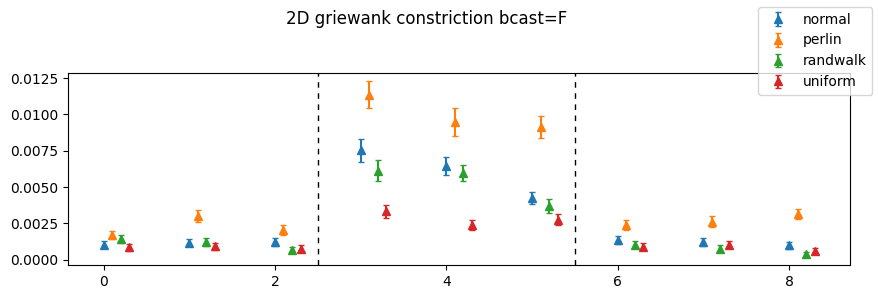

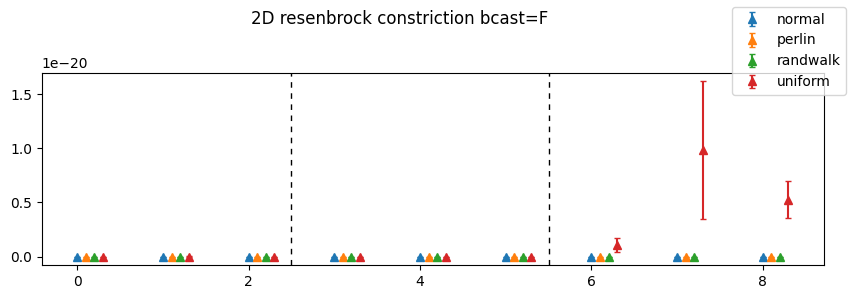

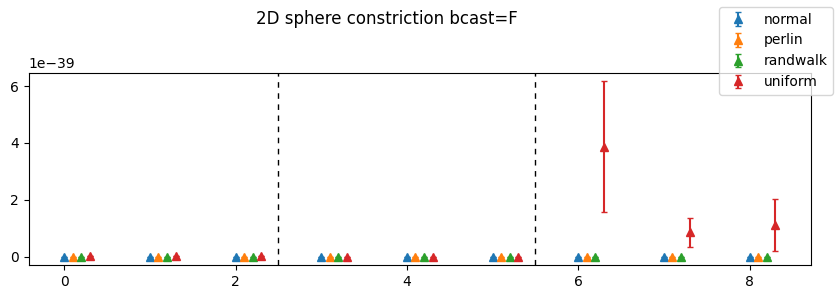

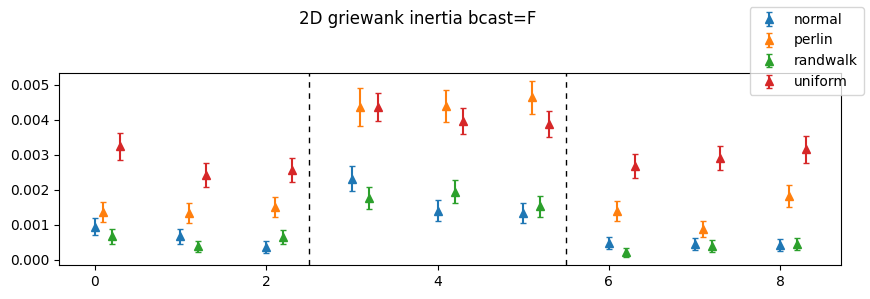

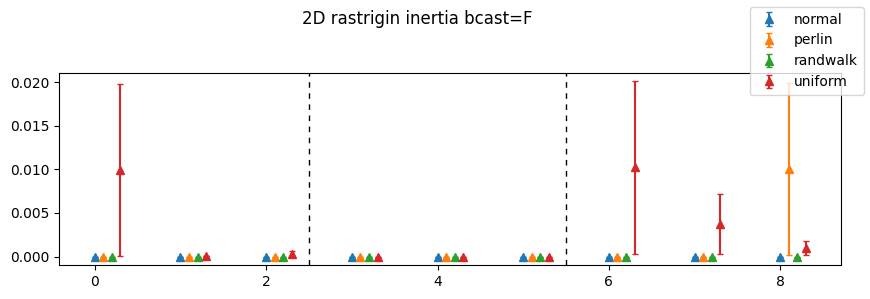

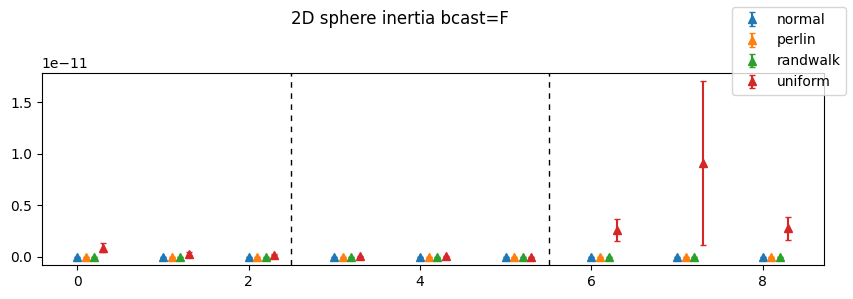

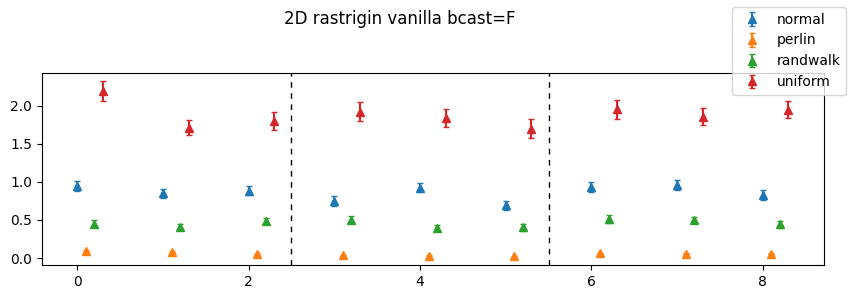

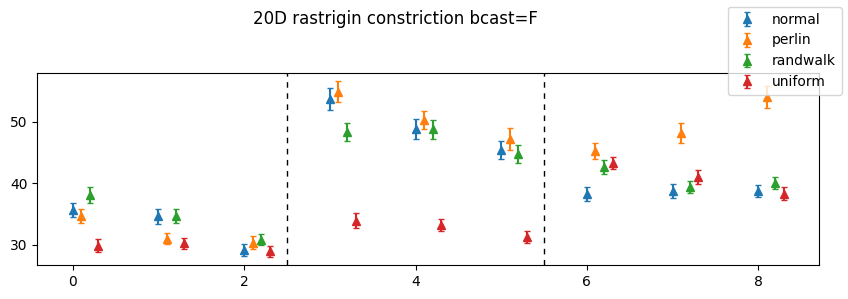

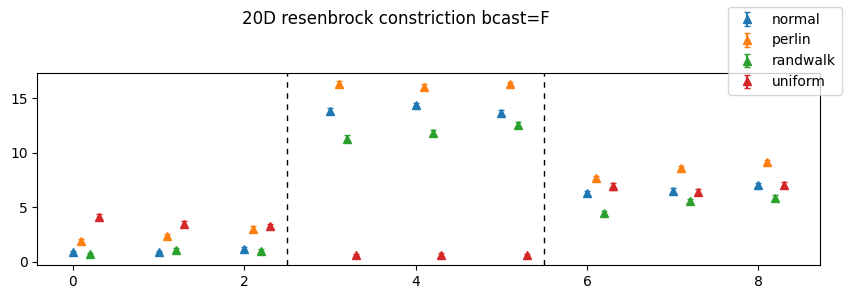

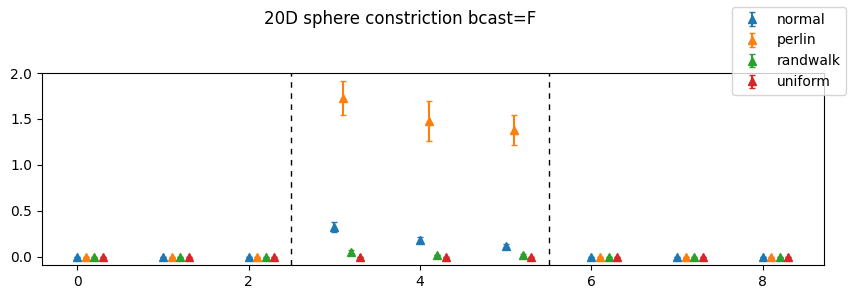

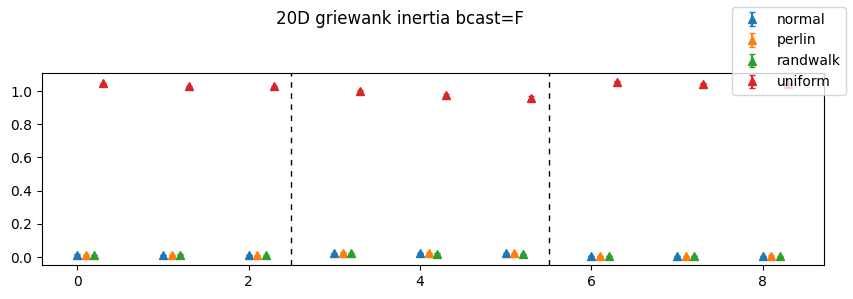

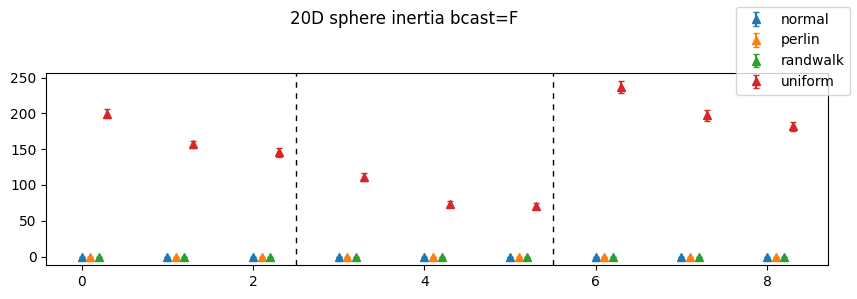

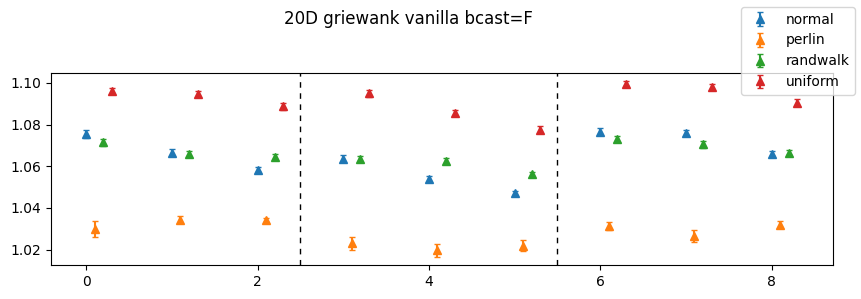

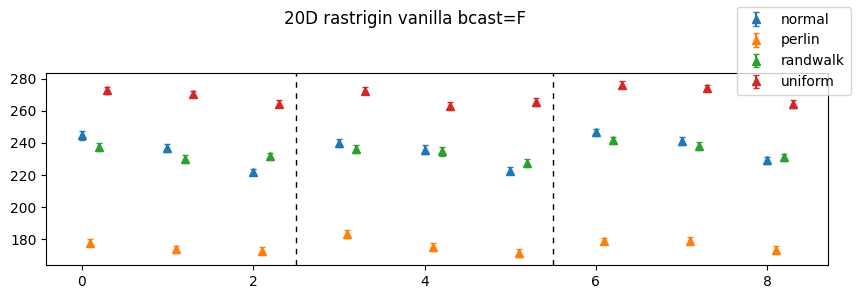

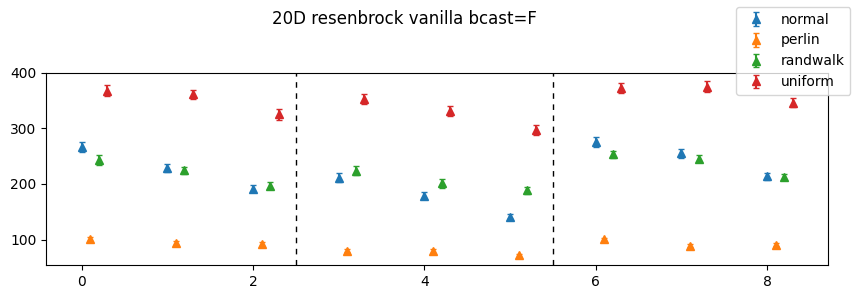

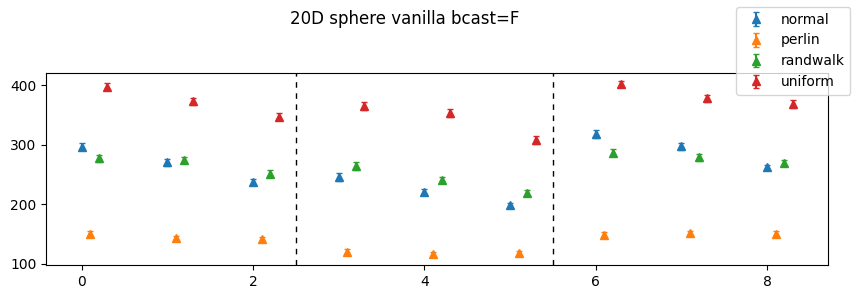

In [8]:
compare_rng()